In [1]:
import numpy as np
from lib import support as sp

In [2]:
y = np.random.rand(1000)
len(y)

1000

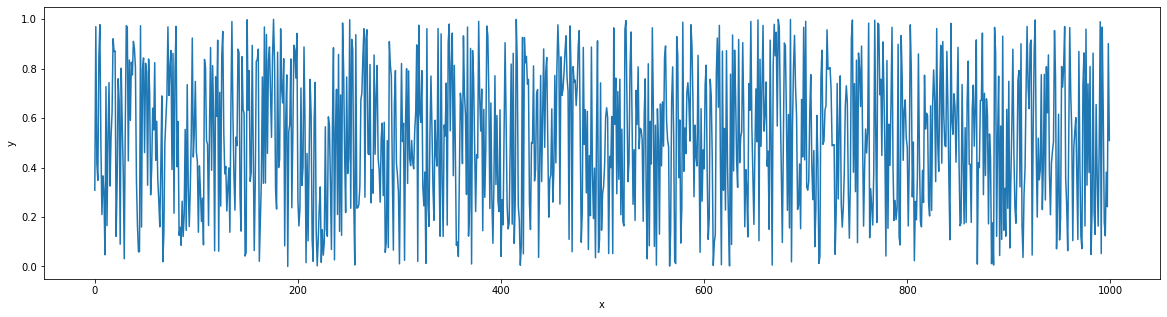

Wall time: 710 ms


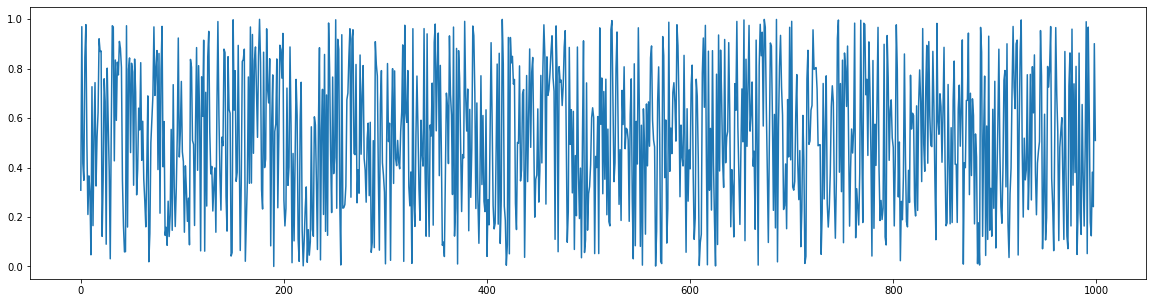

Wall time: 657 ms
Wall time: 531 ms


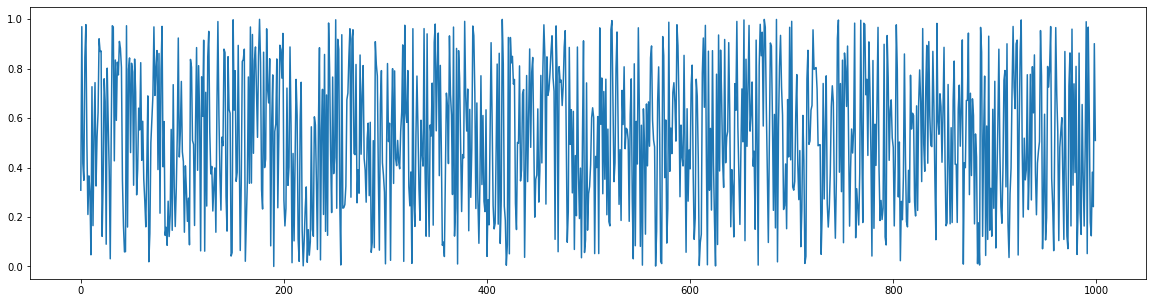

Wall time: 130 ms


In [3]:
%time sp.plot(y, gen_file=True, show=True, xlabel= 'x', ylabel ='y')
%time sp.plot(y, gen_file=True, show=True)
%time sp.plot(y, gen_file=True, show=False)
%time sp.plot(y, gen_file=False, show=True)